In [1]:
import pandas as pd
import yfinance as yf  #download historical and real-time financial data from Yahoo Finance.
import datetime
from datetime import date, timedelta  # timedelta: represents the difference between two dates or times.

In [2]:
# Get today's date and format it as YYYY-MM-DD
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

# Calculate the start date (730 days ago = 2 years) and format it as YYYY-MM-DD
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [3]:
print("Start date:", start_date)
print("End date:", end_date)

Start date: 2022-05-27
End date: 2024-05-26


In [4]:
data = yf.download('BTC-USD', start=start_date, end=end_date, progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
1,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
3,2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274
4,2022-05-31,31723.865234,32249.863281,31286.154297,31792.310547,31792.310547,33538210634


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2024-05-21,71443.062500,71946.460938,69191.125000,70136.531250,70136.531250,46932005990
726,2024-05-22,70135.320312,70623.695312,68977.695312,69122.335938,69122.335938,32802561717
727,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,67929.562500,41895680979
728,2024-05-24,67928.132812,69220.296875,66622.671875,68526.101562,68526.101562,29197308153
729,2024-05-25,68526.921875,69579.320312,68515.820312,69265.945312,69265.945312,15473071741


In [7]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,2023-05-26 12:00:00,32135.694159,32747.256274,31538.526367,32190.694454,32190.694454,2.500407e+10
min,2022-05-27 00:00:00,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,5.331173e+09
25%,2022-11-25 06:00:00,21527.707031,21803.264648,20957.500488,21529.596191,21529.596191,1.516750e+10
50%,2023-05-26 12:00:00,27266.462891,27773.986328,26853.679688,27272.520508,27272.520508,2.249467e+10
75%,2023-11-24 18:00:00,37465.417969,37932.533203,36915.669922,37654.339844,37654.339844,3.117767e+10
max,2024-05-25 00:00:00,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,1.189925e+11
std,NaN,14876.091685,15260.119414,14475.451490,14939.366325,14939.366325,1.375599e+10


In [8]:
data.shape

(730, 7)

In [9]:
import plotly.graph_objects as go
fig1 = go.Figure(data=[go.Candlestick(x=data["Date"],open=data["Open"], high=data["High"],low=data["Low"], close=data["Close"])])
fig1.update_layout(title = "Bitcoin Price Analysis", xaxis_rangeslider_visible=False)
fig1.show()

In [10]:
fig1.write_image("analysis.png")

In [11]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns

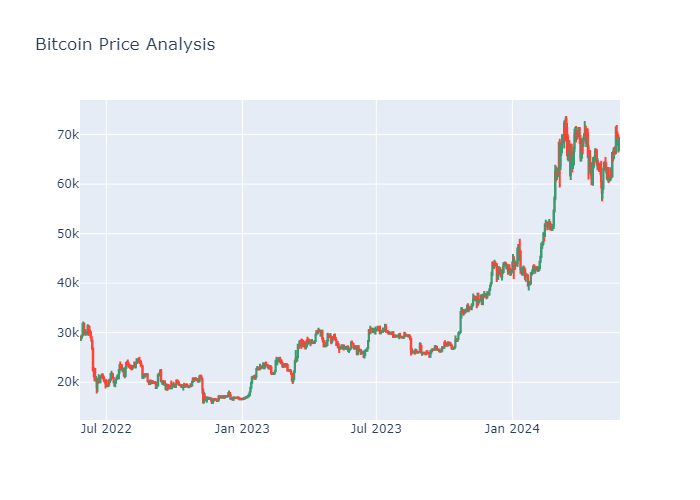

In [12]:
display(Image(filename='analysis.png'))

In [13]:
correlation = data.corr()
print(correlation)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.827366  0.824952  0.833434  0.829322   0.829322   
Open       0.827366  1.000000  0.998866  0.998528  0.997604   0.997604   
High       0.824952  0.998866  1.000000  0.998198  0.999116   0.999116   
Low        0.833434  0.998528  0.998198  1.000000  0.998834   0.998834   
Close      0.829322  0.997604  0.999116  0.998834  1.000000   1.000000   
Adj Close  0.829322  0.997604  0.999116  0.998834  1.000000   1.000000   
Volume    -0.074970  0.236443  0.253270  0.211469  0.234494   0.234494   

             Volume  
Date      -0.074970  
Open       0.236443  
High       0.253270  
Low        0.211469  
Close      0.234494  
Adj Close  0.234494  
Volume     1.000000  


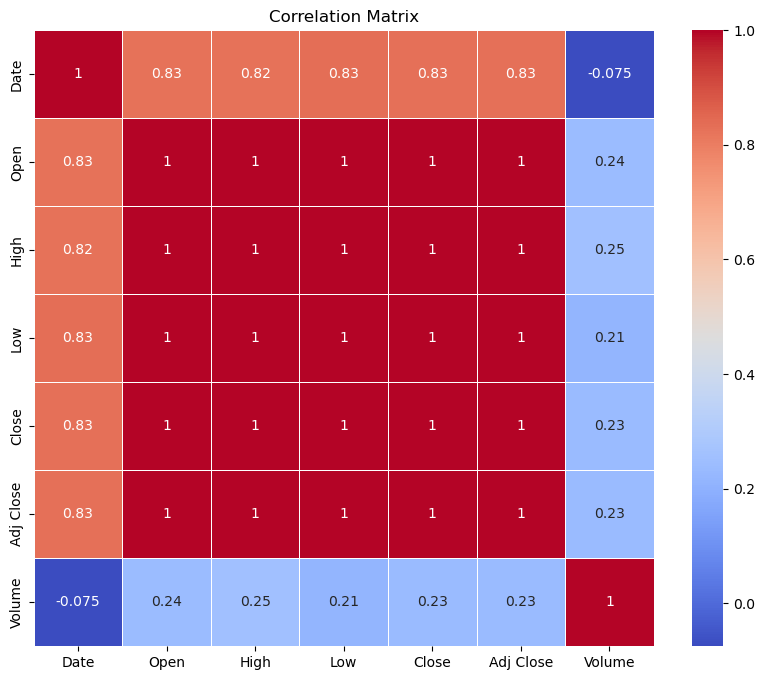

In [14]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Install autots
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Using 4 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 7 with model DatepartRegression in generation 0 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 20

Epoch 1/50


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4402
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4216 
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4143 
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4042 
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3956 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3953
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3921
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3927
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3896
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3882
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3867
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3907
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3910
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3910
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3920
Epoch 16/50
22/22 ━━━━━━━━

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 31 with model FBProphet in generation 0 of 20
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Mod

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 125 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 125 in generation 0: VECM
Model Number: 126 with model ETS in generation 0 of 20
Model Number: 127 with model SectionalMotif in generation 0 of 20
Model Number: 128 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 128 in generation 0: DatepartRegression
Model Number: 129 with model Cassandra in generation 0 of 20
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 129 in generation 0: Cassandra
Model Number: 130 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model Theta in generation 0 of 20
Model Number: 132 with model SectionalMotif in generation 0 of 20
Template Eval Error: ValueError('kth(=15) out of

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 136 in generation 0: GLM
Model Number: 137 with model MetricMotif in generation 0 of 20
Model Number: 138 with model Cassandra in generation 0 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Model Number: 139 with model SeasonalityMotif in generation 0 of 20
Model Number: 140 with model SeasonalityMotif in generation 0 of 20
Model Number: 141 with model GLS in generation 0 of 20
Model Number: 142 with model RRVAR in generation 0 of 20
Model Number: 143 with model ConstantNaive in generation 0 of 20
Model Number: 144 with model GLS in generation 0 of 20
Model Number: 145 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 145 in generation 0: DatepartRegression
Model Number: 146 with model UnobservedComponents in generation 0 of 20
Model Number: 147 with model UnobservedComponents in generation 0 of 20
Model Number: 148 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 148 in generation 0: ARDL
Model Number: 149 with model LastValueNaive in generation 0 of 20
Model Number: 150 with model VA

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 169 with model SeasonalityMotif in generation 0 of 20
Model Number: 170 with model ETS in generation 0 of 20
Model Number: 171 with model DatepartRegression in generation 0 of 20
Model Number: 172 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 172 in generation 0: ARCH
Model Number: 173 with model GLM in generation 0 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 173 in generation 0: GLM
Model Number: 174 with model ConstantNaive in generation 0 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params linear {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'},

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 212 with model UnobservedComponents in generation 1 of 20
Model Number: 213 with model SeasonalityMotif in generation 1 of 20
Model Number: 214 with model SectionalMotif in generation 1 of 20
Model Number: 215 with model SectionalMotif in generation 1 of 20
Model Number: 216 with model SeasonalityMotif in generation 1 of 20
Model Number: 217 with model MetricMotif in generation 1 of 20
Model Number: 218 with model SeasonalityMotif in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'window': 100}, '2': {'decomp_type': 'STL', 'part': 'trend', 'seasonal': 7}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '4': {'det_order': 1, 'k_ar_diff': 1}}") in model 218 in generation 1: SeasonalityMotif
Model Number: 219 with model AverageVal

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1133: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1139: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1350: RuntimeWarning:

overflow encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1337: RuntimeWarning:

overflow encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1337: RuntimeWarning:

invalid value encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1350: RuntimeWarning:

invalid value encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1355: RuntimeWarning:

overflow encountered in multiply



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params mean {'0': {}, '1': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9998520419557735, 0.017201575418260506, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.017201575418260506, 0.9998520419557735, 0.0, 0

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params quadratic {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '2': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 200, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, '3': {'whiten': False}}") in model 266 in generation 1: LastValueNaive
Model Number: 267 with model Theta in generation 1 of 20
Model Number: 268 with model GLM in generation 1 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 268 in generation 1: GLM
Model Number: 269 with model MetricMotif in generation 1 of 20
Model Number: 270 with model SeasonalityMotif in generation 1 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning:

invalid value encountered in log



Model Number: 271 with model UnobservedComponents in generation 1 of 20
Model Number: 272 with model DatepartRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 272 in generation 1: DatepartRegression
Model Number: 273 with model MetricMotif in generation 1 of 20
Model Number: 274 with model AverageValueNaive in generation 1 of 20
Model Number: 275 with model SeasonalNaive in generation 1 of 20
Model Number: 276 with model ConstantNaive in generation 1 of 20
Model Number: 277 with model SeasonalNaive in generation 1 of 20
Model Number: 278 with model Cassandra in generation 1 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 279 with model MultivariateMotif in generation 1 of 20
Model Number: 280 with model Theta in generation 1 of 20
Model Number: 281 with model MetricMotif in generation 1 of 20
Model Number: 282 with model AverageValueNaive in generation 1 of 20
Model Number: 283 with model Cassandra in generation 1 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 284 with model LastValueNaive in generation 1 of 20
Model Number: 285 with model NVAR in generation 1 of 20
Model Number: 286 with model DMD in generation 1 of 20
Model Number: 287 with model SectionalMotif in generation 1 of 20
Model Number: 288 with model UnobservedComponents in generation 1 of 20
Model Number: 289 with model DMD in generation 1 of 20
Model Number: 290 with model Cassandra in generation 1 of 20
Model Number: 291 with model LastValueNaive in generation 1 of 20
Model Number: 292 with model NVAR in generation 1 of 20
Model Number: 293 with model ARDL in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {}, '2': {'det_order': -1, 'k_ar_diff': 2}, '3': {}}") in model 293 in generation 1: ARDL
Model Number: 294 with model Cassandra in generation 1 of 20
Model Number: 295 with 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 308 with model RRVAR in generation 1 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'output_distribution': 'uniform', 'n_quantiles': 233}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 0.5, 'reg_alpha': 100, 'reg_lambda': 1, 'n_estimators': 100, 'grow_policy': 'lossguide'}, 'datepart_method': ['weekdayofmonth', 'common_fourier']}, 'fillna': 'ffill'}, '2': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False}, '3': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 0.7, 'first_value_on

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 315 with model WindowRegression in generation 1 of 20
Model Number: 316 with model UnivariateMotif in generation 1 of 20
Model Number: 317 with model RRVAR in generation 1 of 20
Model Number: 318 with model SeasonalNaive in generation 1 of 20
Model Number: 319 with model LastValueNaive in generation 1 of 20
Model Number: 320 with model SeasonalityMotif in generation 1 of 20
Model Number: 321 with model ConstantNaive in generation 1 of 20
Model Number: 322 with model SeasonalityMotif in generation 1 of 20
Model Number: 323 with model Theta in generation 1 of 20
Model Number: 324 with model SeasonalNaive in generation 1 of 20
Model Number: 325 with model GLM in generation 1 of 20
Model Number: 326 with model GLS in generation 1 of 20
Model Number: 327 with model ARDL in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 327 in generation 1: ARDL
Model Number: 328 with model DMD in generation 1 of 20
Model 

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Model Number: 340 with model SectionalMotif in generation 1 of 20
Model Number: 341 with model WindowRegression in generation 1 of 20
New Generation: 2 of 20
Model Number: 342 with model MultivariateMotif in generation 2 of 20
Model Number: 343 with model Theta in generation 2 of 20
Template Eval Error: Exception("Transformer RobustScaler failed on fit from params quadratic {'0': {'low': 6, 'high': 32, 'K': 3, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {}}") in model 343 in generation 2: Theta
Model Number: 344 with model ARIMA in generation 2 of 20
Model Number: 345 with model MetricMotif in generation 2 of 20
Model Number: 346 with model UnivariateMotif in generation 2 of 20
Model Number: 347 with model UnivariateMotif in generation 2 of 20
Model Number: 348 with model MultivariateRegression in generation 2 of 20
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 348 in generation 2: MultivariateRegress

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 353 with model SeasonalNaive in generation 2 of 20
Model Number: 354 with model ARDL in generation 2 of 20
Model Number: 355 with model MetricMotif in generation 2 of 20
Model Number: 356 with model UnivariateMotif in generation 2 of 20
Model Number: 357 with model RRVAR in generation 2 of 20
Model Number: 358 with model Theta in generation 2 of 20
Model Number: 359 with model UnobservedComponents in generation 2 of 20
Model Number: 360 with model SeasonalityMotif in generation 2 of 20
Model Number: 361 with model GLM in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '1': {'n_harmonics': 20, 'detrend': 'cubic'}, '2': {'decimals': -1, 'on_transform': False, 'on_inverse': True}}") in model 361 in generation 2: GLM
Model Number: 362 with model UnobservedComponents in generation 2 of 20
Model Number

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 364 with model ARIMA in generation 2 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '2': {'method': 100}, '3': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.999852

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 375 with model WindowRegression in generation 2 of 20
Model Number: 376 with model Theta in generation 2 of 20
Model Number: 377 with model NVAR in generation 2 of 20
Model Number: 378 with model SeasonalityMotif in generation 2 of 20
Model Number: 379 with model ConstantNaive in generation 2 of 20
Model Number: 380 with model MetricMotif in generation 2 of 20
Model Number: 381 with model ARIMA in generation 2 of 20
Model Number: 382 with model LastValueNaive in generation 2 of 20
Model Number: 383 with model DatepartRegression in generation 2 of 20
Model Number: 384 with model DatepartRegression in generation 2 of 20
Model Number: 385 with model NVAR in generation 2 of 20
Model Number: 386 with model ARDL in generation 2 of 20
Model Number: 387 with model ConstantNaive in generation 2 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 388 with model ETS in generation 2 of 20
Model Number: 389 with model WindowRegression in generation 2 of 20
Model Number: 390 with model NVAR in generation 2 of 20
Template Eval Error: LinAlgError('SVD did not converge') in model 390 in generation 2: NVAR
Model Number: 391 with model SectionalMotif in generation 2 of 20
Model Number: 392 with model ConstantNaive in generation 2 of 20
Model Number: 393 with model ETS in generation 2 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 394 with model MultivariateRegression in generation 2 of 20
Model Number: 395 with model SectionalMotif in generation 2 of 20
Model Number: 396 with model LastValueNaive in generation 2 of 20
Model Number: 397 with model WindowRegression in generation 2 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on inverse from params linear {'0': {'window_size': 90, 'alpha': 3.5, 'grouping_forward_limit': 3, 'max_level_shifts': 5, 'alignment': 'last_value'}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'recurring'}, 'fillna': 'pchip'}, '2': {}, '3': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 1.5, 'leaf_size': 30}, 'datepart_method': 'common_fourier'}, 'fillna': 'ffill'}, '4': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'lowpass', 'analog': False, 'output': 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 399 with model ARDL in generation 2 of 20
Model Number: 400 with model Cassandra in generation 2 of 20
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 400 in generation 2: Cassandra
Model Number: 401 with model MetricMotif in generation 2 of 20
Model Number: 402 with model ARIMA in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 402 in generation 2: ARIMA
Model Number: 403 with model AverageValueNaive in generation 2 of 20
Model Number: 404 with model ConstantNaive in generation 2 of 20
Model Number: 405 with model UnobservedComponents in generation 2 of 20
Model Number: 406 with model AverageValueNaive in generation 2 of 20
Model Number: 407 with model GLS in generation 2 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params quadratic {'0': {}, '1': {}, '2': {'window_size': 30, 'a

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 440 with model SectionalMotif in generation 2 of 20
Model Number: 441 with model AverageValueNaive in generation 2 of 20
Model Number: 442 with model ConstantNaive in generation 2 of 20
Model Number: 443 with model UnobservedComponents in generation 2 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: LinAlgError('Singular matrix') in model 443 in generation 2: UnobservedComponents
Model Number: 444 with model ETS in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'discretization': 'center', 'n_bins': 5}, '3': {'output_distribution': 'uniform', 'n_quantiles': 'tenth'}, '4': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 1000, 'min_samples_leaf': 4, 'bootstrap': True}}, 'datepart_method': [7, 365.25], 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, '5': {}}") in model 444 in generation 2: ETS
Model Number: 445 with model Cassandra in generation 2 of 20
Model Number: 446 with model UnobservedComponents in generation 2 of 20
Model Number: 447 with model MultivariateMotif in generation 2 of 20
Model Number: 448 with model AverageValueNa

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



New Generation: 3 of 20
Model Number: 482 with model DMD in generation 3 of 20
Model Number: 483 with model LastValueNaive in generation 3 of 20
Model Number: 484 with model SeasonalNaive in generation 3 of 20
Model Number: 485 with model DatepartRegression in generation 3 of 20
Model Number: 486 with model UnobservedComponents in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 486 in generation 3: UnobservedComponents
Model Number: 487 with model ARIMA in generation 3 of 20
Model Number: 488 with model GLM in generation 3 of 20
Model Number: 489 with model SeasonalNaive in generation 3 of 20
Model Number: 490 with model ARIMA in generation 3 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params zero {'0': {}, '1': {'algorithm': 'parallel', 'fun': 'cube', 'max_iter': 250, 'whiten': True}, '2': {}, '3': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.7

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 520 with model AverageValueNaive in generation 3 of 20
Model Number: 521 with model WindowRegression in generation 3 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'det_order': 1, 'k_ar_diff': 1}}") in model 521 in generation 3: WindowRegression
Model Number: 522 with model ARDL in generation 3 of 20
Model Number: 523 with model WindowRegression in generation 3 of 20
Model Number: 524 with model SeasonalityMotif in generation 3 of 20
Model Number: 525 with model ARDL in generation 3 of 20
Model Number: 526 with model ARIMA in generation 3 of 20
Model Number: 527 with model ConstantNaive in generation 3 of 20
Model Number: 528 with model LastValueNaive in generation 3 of 20
Model Number: 529 with model LastValueNaive in generation 3 of 20
Model Number: 530 with model SeasonalityMotif in generation 3 of 20
Mod

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Model Number: 551 with model SectionalMotif in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'lag_1': 2, 'method': 'LastValue'}, '1': {'rows': 2, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'method': 'remove', 'std_threshold': 2, 'fillna': 'ffill'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True, 'threshold': None}}") in model 551 in generation 3: SectionalMotif
Model Number: 552 with model Theta in generation 3 of 20
Model Number: 553 with model UnobservedComponents in generation 3 of 20
Model Number: 554 with model UnobservedComponents in generation 3 of 20
Model Number: 555 with model AverageValueNaive in generation 3 of 20
Model Number: 556 with model DatepartRegression in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 556 in generation 3: Da

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 559 with model ARDL in generation 3 of 20
Model Number: 560 with model Cassandra in generation 3 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 561 with model DMD in generation 3 of 20
Model Number: 562 with model FFT in generation 3 of 20
Model Number: 563 with model ARIMA in generation 3 of 20
Model Number: 564 with model WindowRegression in generation 3 of 20
Model Number: 565 with model Cassandra in generation 3 of 20
Model Number: 566 with model ARIMA in generation 3 of 20
Model Number: 567 with model UnobservedComponents in generation 3 of 20
Model Number: 568 with model MultivariateMotif in generation 3 of 20
Model Number: 569 with model Theta in generation 3 of 20
Model Number: 570 with model AverageValueNaive in generation 3 of 20
Model Number: 571 with model GLS in generation 3 of 20
Model Number: 572 with model GLM in generation 3 of 20
Model Number: 573 with model RRVAR in generation 3 of 20
Model Number: 574 with model GLM in generation 3 of 20
Model Number: 575 with model MetricMotif in generation 3 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 576 with model ETS in generation 3 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params nearest {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.03, 'min_child_weight': 2, 'subsample': 1, 'colsample_bylevel': 0.7, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 20}, 'datepart_method': 'simple_poly'}, 'fillna': 'ffill'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'model': 'Poisson', 'phi': 1, 'window': None, 'transform_dict': None}}") in model 576 in generation 3: ETS
Model Number: 577 with model Cassandra in generation 3 of 20
Model Number: 578 with model UnobservedComponents in generation 3 of 20
Model Number: 579 with model ARDL in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 579 in generation 3: ARDL
Mode

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 601 with model MetricMotif in generation 3 of 20
Model Number: 602 with model SeasonalityMotif in generation 3 of 20
Model Number: 603 with model WindowRegression in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 603 in generation 3: WindowRegression
Model Number: 604 with model ARDL in generation 3 of 20
Model Number: 605 with model ARIMA in generation 3 of 20
Model Number: 606 with model MetricMotif in generation 3 of 20
Model Number: 607 with model ARDL in generation 3 of 20
Model Number: 608 with model MultivariateRegression in generation 3 of 20
Model Number: 609 with model SectionalMotif in generation 3 of 20
Model Number: 610 with model MultivariateMotif in generation 3 of 20
Model Number: 611 with model Cassandra in generation 3 of 20
Model Number: 612 with model MetricMotif in generation 3 of 20
Model Number: 613 with model MetricMotif in generation 3 of 20
Model Number: 614 with model GLS in g

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



New Generation: 4 of 20
Model Number: 622 with model ARDL in generation 4 of 20
Model Number: 623 with model MultivariateRegression in generation 4 of 20
Model Number: 624 with model MultivariateMotif in generation 4 of 20
Model Number: 625 with model AverageValueNaive in generation 4 of 20
Model Number: 626 with model Theta in generation 4 of 20
Model Number: 627 with model SeasonalNaive in generation 4 of 20
Model Number: 628 with model ARIMA in generation 4 of 20
Model Number: 629 with model MetricMotif in generation 4 of 20
Model Number: 630 with model SectionalMotif in generation 4 of 20
Model Number: 631 with model ARDL in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params akima {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'constant': 1, 're

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 636 with model SeasonalityMotif in generation 4 of 20
Model Number: 637 with model UnivariateMotif in generation 4 of 20
Model Number: 638 with model MultivariateMotif in generation 4 of 20
Model Number: 639 with model GLS in generation 4 of 20
Model Number: 640 with model UnobservedComponents in generation 4 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 641 with model MetricMotif in generation 4 of 20
Model Number: 642 with model WindowRegression in generation 4 of 20
Model Number: 643 with model Theta in generation 4 of 20
Model Number: 644 with model Cassandra in generation 4 of 20
Model Number: 645 with model MultivariateMotif in generation 4 of 20
Model Number: 646 with model ARDL in generation 4 of 20
Model Number: 647 with model Theta in generation 4 of 20
Model Number: 648 with model Cassandra in generation 4 of 20
Model Number: 649 with model FFT in generation 4 of 20
Model Number: 650 with model GLM in generation 4 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 651 with model LastValueNaive in generation 4 of 20
Model Number: 652 with model SeasonalNaive in generation 4 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on inverse from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 10}, 'datepart_method': 'common_fourier_rw'}, 'fillna': 'linear'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '2': {'fixed': True, 'window': 7, 'macro_micro': False, 'center': True}, '3': {'constant': 0, 'reintroduction_model': None, 'fillna': 'pchip'}, '4': {'discretization': 'lower', 'n_bins': 5}}") in model 652 in generation 4: SeasonalNaive
Model Number: 653 with model Cassandra in generation 4 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 654 with model SeasonalityMotif in generation 4 of 20
Model Number: 655 with model ARIMA in generation 4 of 20
Model Number: 656 with model WindowRegression in generation 4 of 20
Template Eval Error: Exception("Transformer MaxAbsScaler failed on fit from params mean {'0': {'low': 6, 'high': 28, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {}}") in model 656 in generation 4: WindowRegression
Model Number: 657 with model ConstantNaive in generation 4 of 20
Model Number: 658 with model WindowRegression in generation 4 of 20
Model Number: 659 with model SeasonalNaive in generation 4 of 20
Model Number: 660 with model MultivariateMotif in generation 4 of 20
Model Number: 661 with model WindowRegression in generation 4 of 20
Model Number: 662 with model ConstantNaive in generation 4 of 20
Model Number: 663 with 

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 700 in generation 4: Cassandra
Model Number: 701 with model AverageValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '2': {'fillna': 'mean', 'center': 'zero'}}") in model 701 in generation 4: AverageValueNaive
Model Number: 702 with model SectionalMotif in generation 4 of 20
Model Number: 703 with model LastValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolling_mean {'0': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 250, 'whiten': True}}") in model 703 in generation 4: Las

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 712 with model SeasonalNaive in generation 4 of 20
Model Number: 713 with model DatepartRegression in generation 4 of 20
Model Number: 714 with model UnobservedComponents in generation 4 of 20
Model Number: 715 with model LastValueNaive in generation 4 of 20
Model Number: 716 with model ConstantNaive in generation 4 of 20
Model Number: 717 with model LastValueNaive in generation 4 of 20
Model Number: 718 with model MetricMotif in generation 4 of 20
Model Number: 719 with model UnobservedComponents in generation 4 of 20
Model Number: 720 with model AverageValueNaive in generation 4 of 20
Model Number: 721 with model ETS in generation 4 of 20
Model Number: 722 with model SeasonalityMotif in generation 4 of 20
Model Number: 723 with model SeasonalityMotif in generation 4 of 20
Model Number: 724 with model MetricMotif in generation 4 of 20
Model Number: 725 with model AverageValueNaive in generation 4 of 20
Model Number: 726 with model GLS in generation 4 of 20
Model Number: 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 728 with model ARDL in generation 4 of 20
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 728 in generation 4: ARDL
Model Number: 729 with model MetricMotif in generation 4 of 20
Model Number: 730 with model LastValueNaive in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}}") in model 730 in generation 4: LastValueNaive
Model Number: 731 with model AverageValueNaive in generation 4 of 20
Model Number: 732 with model Cassandra in generation 4 of 20
Model Number: 733 with model SectionalMotif in generation 4 of 20
Model Number: 734 with model MultivariateMotif in generation 4 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 754 with model UnobservedComponents in generation 4 of 20
Model Number: 755 with model ConstantNaive in generation 4 of 20
Model Number: 756 with model ARDL in generation 4 of 20
Model Number: 757 with model Theta in generation 4 of 20
Model Number: 758 with model AverageValueNaive in generation 4 of 20
Model Number: 759 with model Theta in generation 4 of 20
Model Number: 760 with model MultivariateMotif in generation 4 of 20
Model Number: 761 with model SectionalMotif in generation 4 of 20
New Generation: 5 of 20
Model Number: 762 with model AverageValueNaive in generation 5 of 20
Model Number: 763 with model Theta in generation 5 of 20
Model Number: 764 with model ARDL in generation 5 of 20
Model Number: 765 with model SeasonalityMotif in generation 5 of 20
Model Number: 766 with model MultivariateMotif in generation 5 of 20
Model Number: 767 with model WindowRegression in generation 5 of 20
Model Number: 768 with model UnivariateMotif in generation 5 of 20
Model Numbe

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 800 with model Theta in generation 5 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {'model': 'Poisson', 'phi': 0.999, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '3': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'average'}, '4': {}}") in model 800 in generation 5: Theta
Model Number: 801 with model Cassandra in generation 5 of 20
Model Number: 802 with model ARDL in generation 5 of 20
Model Number: 803 with model ConstantNaive in generation 5 of 20
Model Number: 804 with model SeasonalityMotif in generation 5 of 20
Model Number: 805 with model SeasonalityMotif in generation 5 of 20
Model Number: 806 with model UnobservedComponents in generation 5 of 20
Model Number: 807 with model AverageValueNaive in generation 5 of 20

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 810 with model WindowRegression in generation 5 of 20
Model Number: 811 with model MultivariateRegression in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 811 in generation 5: MultivariateRegression
Model Number: 812 with model LastValueNaive in generation 5 of 20
Model Number: 813 with model AverageValueNaive in generation 5 of 20
Model Number: 814 with model MultivariateMotif in generation 5 of 20
Model Number: 815 with model SeasonalityMotif in generation 5 of 20
Model Number: 816 with model Cassandra in generation 5 of 20
Model Number: 817 with model SeasonalityMotif in generation 5 of 20
Model Number: 818 with model ConstantNaive in generation 5 of 20
Model Number: 819 with model Cassandra in generation 5 of 20
Model Number: 820 with model Theta in generation 5 of 20
Model Number: 821 with model RRVAR in generation 5 of 20
Model Number: 822 with model SeasonalNaive in generation 5 of 20
Model 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'simple_2', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': True}, '3': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, '4': {}}") in model 840 in generation 5: GLM
Model Number: 841 with model ARDL in generation 5 of 20
Model Number: 842 with model WindowRegression in generation 5 of 20
Template Eval Error: Value

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 853 with model NVAR in generation 5 of 20
Model Number: 854 with model Cassandra in generation 5 of 20
Template Eval Error: ValueError('The covariance matrix of the support data is equal to 0, try to increase support_fraction') in model 854 in generation 5: Cassandra
Model Number: 855 with model SeasonalityMotif in generation 5 of 20
Model Number: 856 with model NVAR in generation 5 of 20
Model Number: 857 with model Theta in generation 5 of 20
Model Number: 858 with model ARIMA in generation 5 of 20
Model Number: 859 with model UnobservedComponents in generation 5 of 20
Model Number: 860 with model Cassandra in generation 5 of 20
Model Number: 861 with model Cassandra in generation 5 of 20
Model Number: 862 with model AverageValueNaive in generation 5 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 863 with model SectionalMotif in generation 5 of 20
Model Number: 864 with model WindowRegression in generation 5 of 20
Model Number: 865 with model DMD in generation 5 of 20
Model Number: 866 with model ARDL in generation 5 of 20
Model Number: 867 with model MultivariateMotif in generation 5 of 20
Model Number: 868 with model UnivariateMotif in generation 5 of 20
Model Number: 869 with model ARIMA in generation 5 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params mean {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None, 'trend_method': 'local_linear'}, '1': {'method': 'remove', 'std_threshold': 3, 'fillna': 'rolling_mean_24'}, '2': {'fillna': 'akima', 'c

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 908 with model AverageValueNaive in generation 6 of 20
Model Number: 909 with model SeasonalNaive in generation 6 of 20
Model Number: 910 with model GLM in generation 6 of 20
Model Number: 911 with model ARDL in generation 6 of 20
Model Number: 912 with model Cassandra in generation 6 of 20
Model Number: 913 with model AverageValueNaive in generation 6 of 20
Model Number: 914 with model GLS in generation 6 of 20
Model Number: 915 with model ARIMA in generation 6 of 20
Model Number: 916 with model MultivariateMotif in generation 6 of 20
Model Number: 917 with model Cassandra in generation 6 of 20
Model Number: 918 with model Cassandra in generation 6 of 20
Template Eval Error: ValueError('negative dimensions are not allowed') in model 918 in generation 6: Cassandra
Model Number: 919 with model RRVAR in generation 6 of 20
Model Number: 920 with model MultivariateRegression in generation 6 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 920 in generation 6: MultivariateRegression
Model Number: 921 with model ARIMA in generation 6 of 20
Model Number: 922 with model UnivariateMotif in generation 6 of 20
Model Number: 923 with model MultivariateMotif in generation 6 of 20
Model Number: 924 with model ARIMA in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 924 in generation 6: ARIMA
Model Number: 925 with model DMD in generation 6 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsam

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 938 with model UnivariateMotif in generation 6 of 20
Model Number: 939 with model DMD in generation 6 of 20
Model Number: 940 with model SeasonalityMotif in generation 6 of 20
Model Number: 941 with model SeasonalityMotif in generation 6 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params rolling_mean {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'algorithm': 'deflation', 'fun': 'exp', 'max_iter': 250, 'whiten': True}, '2': {'output_distribution': 'uniform', 'n_quantiles': 'tenth'}}") in model 941 in generation 6: SeasonalityMotif
Model Number: 942 with model NVAR in generation 6 of 20
Model Number: 943 with model Cassandra in generation 6 of 20
Model Number: 944 with model DMD in generation 6 of 20
Model Number: 945 with model MultivariateMotif in generation 6 of 20
Model Number: 946 with model DMD in generation 6 of 20
Model Number: 947 with model LastValueNaive in generation 6 of 20
Model Number: 948 with model ARIMA in generation 6 of 20
Mod

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 951 with model NVAR in generation 6 of 20
Model Number: 952 with model MetricMotif in generation 6 of 20
Model Number: 953 with model UnobservedComponents in generation 6 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 953 in generation 6: UnobservedComponents
Model Number: 954 with model MultivariateMotif in generation 6 of 20
Model Number: 955 with model AverageValueNaive in generation 6 of 20
Model Number: 956 with model Theta in generation 6 of 20
Model Number: 957 with model ETS in generation 6 of 20
Model Number: 958 with model DMD in generation 6 of 20
Model Number: 959 with model SectionalMotif in generation 6 of 20
Model Number: 960 with model SectionalMotif in generation 6 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 960 in generation 6: SectionalMotif
Model Number: 961 with model SeasonalNaive in generation 6 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 974 with model LastValueNaive in generation 6 of 20
Model Number: 975 with model SeasonalityMotif in generation 6 of 20
Model Number: 976 with model Theta in generation 6 of 20
Model Number: 977 with model Theta in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'remove', 'std_threshold': 4.5, 'fillna': 'mean'}, '1': {'decimals': -1, 'on_transform': True, 'on_inverse': False}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}}") in model 977 in generation 6: Theta
Model Number: 978 with model MetricMotif in generation 6 of 20
Model Number: 979 with model SectionalMotif in generation 6 of 20
Model Number: 980 with model ARDL in generation 6 of 20
Model Number: 981 with model ARIMA in generation 6 of 20
Model Number: 982 with model Cassandra in generation 6 of 20
Model Number: 983 with model WindowRegression in generation 6 of 20
Mo

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1133: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1139: RuntimeWarning:

overflow encountered in cast

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1350: RuntimeWarning:

invalid value encountered in matmul

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\fast_kalman.py:1337: RuntimeWarning:

invalid value encountered in matmul



Model Number: 1010 with model SectionalMotif in generation 7 of 20
Model Number: 1011 with model Cassandra in generation 7 of 20
Model Number: 1012 with model WindowRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1012 in generation 7: WindowRegression
Model Number: 1013 with model ARDL in generation 7 of 20
Model Number: 1014 with model AverageValueNaive in generation 7 of 20
Model Number: 1015 with model Theta in generation 7 of 20
Model Number: 1016 with model NVAR in generation 7 of 20
Model Number: 1017 with model SeasonalityMotif in generation 7 of 20
Model Number: 1018 with model AverageValueNaive in generation 7 of 20
Model Number: 1019 with model AverageValueNaive in generation 7 of 20
Model Number: 1020 with model ARIMA in generation 7 of 20
Model Number: 1021 with model RRVAR in generation 7 of 20
Template Eval Error: LinAlgError('Array must not contain infs or NaNs') in model 1021 in generatio

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\models\matrix_var.py:62: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\models\matrix_var.py:62: RuntimeWarning:

invalid value encountered in multiply

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1023 with model LastValueNaive in generation 7 of 20
Model Number: 1024 with model ConstantNaive in generation 7 of 20
Model Number: 1025 with model SeasonalNaive in generation 7 of 20
Model Number: 1026 with model ARIMA in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1026 in generation 7: ARIMA
Model Number: 1027 with model MultivariateMotif in generation 7 of 20
Model Number: 1028 with model Theta in generation 7 of 20
Model Number: 1029 with model AverageValueNaive in generation 7 of 20
Model Number: 1030 with model ARIMA in generation 7 of 20
Model Number: 1031 with model GLS in generation 7 of 20
Model Number: 1032 with model NVAR in generation 7 of 20
Model Number: 1033 with model Cassandra in generation 7 of 20
Model Number: 1034 with model MetricMotif in generation 7 of 20
Model Number: 1035 with model SectionalMotif in generation 7 of 20
Model Number: 1036 with model ConstantNaive in gener

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1080 with model ARIMA in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {}, '1': {'low': 6, 'high': 728, 'K': 12, 'lanczos_factor': True, 'return_diff': True, 'on_transform': True, 'on_inverse': False}, '2': {'lag_1': 4, 'method': 'LastValue'}, '3': {}, '4': {'det_order': 1, 'k_ar_diff': 0}}") in model 1080 in generation 7: ARIMA
Model Number: 1081 with model GLM in generation 7 of 20
Model Number: 1082 with model SectionalMotif in generation 7 of 20
Model Number: 1083 with model Theta in generation 7 of 20
Model Number: 1084 with model LastValueNaive in generation 7 of 20
Model Number: 1085 with model UnobservedComponents in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1085 in generation 7: UnobservedComponents
Model Number: 1086 with model SeasonalityMotif in generation 7 of 20
Model Number: 1087 with model DMD in generation 7 of 2

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 1096 with model ARDL in generation 7 of 20
Model Number: 1097 with model GLS in generation 7 of 20
New Generation: 8 of 20
Model Number: 1098 with model UnobservedComponents in generation 8 of 20
Model Number: 1099 with model MetricMotif in generation 8 of 20
Model Number: 1100 with model ARDL in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1100 in generation 8: ARDL
Model Number: 1101 with model SeasonalNaive in generation 8 of 20
Model Number: 1102 with model ARDL in generation 8 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1123 with model Theta in generation 8 of 20
Model Number: 1124 with model SeasonalityMotif in generation 8 of 20
Model Number: 1125 with model Cassandra in generation 8 of 20
Model Number: 1126 with model ARDL in generation 8 of 20
Model Number: 1127 with model WindowRegression in generation 8 of 20
Model Number: 1128 with model AverageValueNaive in generation 8 of 20
Model Number: 1129 with model ETS in generation 8 of 20
Model Number: 1130 with model NVAR in generation 8 of 20
Model Number: 1131 with model Theta in generation 8 of 20
Model Number: 1132 with model MultivariateMotif in generation 8 of 20
Model Number: 1133 with model LastValueNaive in generation 8 of 20
Model Number: 1134 with model UnivariateMotif in generation 8 of 20
Model Number: 1135 with model Theta in generation 8 of 20
Model Number: 1136 with model NVAR in generation 8 of 20
Model Number: 1137 with model ETS in generation 8 of 20
Model Number: 1138 with model ConstantNaive in generation 8 of 20
Mo

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:1988: RuntimeWarning:

overflow encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\models\matrix_var.py:30: RuntimeWarning:

invalid value encountered in matmul



Model Number: 1145 with model WindowRegression in generation 8 of 20
Model Number: 1146 with model WindowRegression in generation 8 of 20
Model Number: 1147 with model SeasonalNaive in generation 8 of 20
Model Number: 1148 with model NVAR in generation 8 of 20
Model Number: 1149 with model SeasonalityMotif in generation 8 of 20
Model Number: 1150 with model DMD in generation 8 of 20
Model Number: 1151 with model ARIMA in generation 8 of 20
Model Number: 1152 with model NVAR in generation 8 of 20
Model Number: 1153 with model SectionalMotif in generation 8 of 20
Model Number: 1154 with model DMD in generation 8 of 20
Model Number: 1155 with model ARIMA in generation 8 of 20
Model Number: 1156 with model SeasonalityMotif in generation 8 of 20
Model Number: 1157 with model GLS in generation 8 of 20
Model Number: 1158 with model LastValueNaive in generation 8 of 20
Model Number: 1159 with model LastValueNaive in generation 8 of 20
Template Eval Error: Exception("Transformer AlignLastValue 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1173 with model DatepartRegression in generation 8 of 20
Model Number: 1174 with model ARDL in generation 8 of 20
Model Number: 1175 with model SeasonalNaive in generation 8 of 20
Model Number: 1176 with model MultivariateMotif in generation 8 of 20
Model Number: 1177 with model MultivariateMotif in generation 8 of 20
Model Number: 1178 with model ARIMA in generation 8 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'span': 93}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}}") in model 1178 in generation 8: ARIMA
Model Number: 1179 with model Cassandra in generation 8 of 20
Model Number: 1180 with model MultivariateMotif in generation 8 of 20
Model Number: 1181 with model MetricMotif in generation 8 of 20
Model Number: 1182 with model UnobservedComponents in generation 8 of 20
Model Number: 1183 with model Theta in generation 8 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1184 with model GLM in generation 8 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1184 in generation 8: GLM


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning:

overflow encountered in square

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:325: RuntimeWarning:

divide by zero encountered in power

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\sta

Model Number: 1185 with model ARDL in generation 8 of 20
Model Number: 1186 with model Theta in generation 8 of 20
Model Number: 1187 with model UnivariateMotif in generation 8 of 20
Model Number: 1188 with model DMD in generation 8 of 20
Model Number: 1189 with model MetricMotif in generation 8 of 20
Model Number: 1190 with model Cassandra in generation 8 of 20
Model Number: 1191 with model ARDL in generation 8 of 20
Model Number: 1192 with model AverageValueNaive in generation 8 of 20
Model Number: 1193 with model ETS in generation 8 of 20
Model Number: 1194 with model ARIMA in generation 8 of 20
Model Number: 1195 with model WindowRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1195 in generation 8: WindowRegression
Model Number: 1196 with model SeasonalityMotif in generation 8 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'rows': 1, 'l

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1204 with model SeasonalNaive in generation 8 of 20
Model Number: 1205 with model SeasonalityMotif in generation 8 of 20
Model Number: 1206 with model SeasonalNaive in generation 8 of 20
Model Number: 1207 with model Theta in generation 8 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1208 with model Theta in generation 8 of 20
Model Number: 1209 with model UnobservedComponents in generation 8 of 20
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1209 in generation 8: UnobservedComponents
New Generation: 9 of 20
Model Number: 1210 with model Theta in generation 9 of 20
Model Number: 1211 with model UnobservedComponents in generation 9 of 20
Model Number: 1212 with model MultivariateMotif in generation 9 of 20
Model Number: 1213 with model ARIMA in generation 9 of 20
Model Number: 1214 with model LastValueNaive in generation 9 of 20
Model Number: 1215 with model DatepartRegression in generation 9 of 20
Model Number: 1216 with model ARIMA in generation 9 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1217 with model NVAR in generation 9 of 20
Model Number: 1218 with model ARDL in generation 9 of 20
Model Number: 1219 with model ARIMA in generation 9 of 20
Model Number: 1220 with model AverageValueNaive in generation 9 of 20
Model Number: 1221 with model ConstantNaive in generation 9 of 20
Model Number: 1222 with model ARIMA in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1222 in generation 9: ARIMA
Model Number: 1223 with model AverageValueNaive in generation 9 of 20
Model Number: 1224 with model NVAR in generation 9 of 20
Model Number: 1225 with model LastValueNaive in generation 9 of 20
Model Number: 1226 with model NVAR in generation 9 of 20
Model Number: 1227 with model DMD in generation 9 of 20
Model Number: 1228 with model Theta in generation 9 of 20
Model Number: 1229 with model SeasonalityMotif in generation 9 of 20
Model Number: 1230 with model MetricMotif in generation 9 of 20
Model N

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 1248 with model MultivariateMotif in generation 9 of 20
Model Number: 1249 with model WindowRegression in generation 9 of 20
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1249 in generation 9: WindowRegression
Model Number: 1250 with model DMD in generation 9 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'lag_1': 96, 'method': 20}, '2': {}, '3': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': False}, '4': {'det_order': 0, 'k_ar_diff': 0}}") in model 1250 in generation 9: DMD
Model Number: 1251 with model UnivariateMotif in generation 9 of 20
Model Number: 1252 with model DatepartRegression in generation 9 of 20
Model Number: 1253 with model SeasonalNaive in generation 9 of 20
Model Number: 1254 with model WindowRegression in generation 9 of 20
Model Number: 1255 with model ARDL in generation 9 of 20
Template 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1269 with model MultivariateMotif in generation 9 of 20
Model Number: 1270 with model AverageValueNaive in generation 9 of 20
Model Number: 1271 with model Theta in generation 9 of 20
Model Number: 1272 with model AverageValueNaive in generation 9 of 20
Model Number: 1273 with model NVAR in generation 9 of 20
Model Number: 1274 with model SeasonalityMotif in generation 9 of 20
Model Number: 1275 with model SectionalMotif in generation 9 of 20
Model Number: 1276 with model NVAR in generation 9 of 20
Model Number: 1277 with model ConstantNaive in generation 9 of 20
Model Number: 1278 with model LastValueNaive in generation 9 of 20
Model Number: 1279 with model MultivariateRegression in generation 9 of 20
Model Number: 1280 with model Theta in generation 9 of 20
Model Number: 1281 with model AverageValueNaive in generation 9 of 20
Model Number: 1282 with model WindowRegression in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regress

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+10, tolerance: 1.302e+07



Model Number: 1531 with model SectionalMotif in generation 12 of 20
Model Number: 1532 with model Theta in generation 12 of 20
Model Number: 1533 with model SeasonalityMotif in generation 12 of 20
Model Number: 1534 with model AverageValueNaive in generation 12 of 20
Model Number: 1535 with model NVAR in generation 12 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'output_distribution': 'uniform', 'n_quantiles': 233}, '1': {'fixed': False, 'window': 12, 'macro_micro': False, 'center': False}, '2': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '4': {'method': 'remove', 'std_threshold': 2, 'fillna': 'mean'}}") in model 1535 in generation 12: NVAR
Model Number: 1536 with model Cassandra in generation 12 of 20
Model Number: 1537 with model MetricMotif 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1553 with model ARIMA in generation 12 of 20
Model Number: 1554 with model ARDL in generation 12 of 20
Model Number: 1555 with model SeasonalityMotif in generation 12 of 20
Model Number: 1556 with model SectionalMotif in generation 12 of 20
Model Number: 1557 with model SeasonalNaive in generation 12 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params linear {'0': {'lag_1': 2, 'method': 'Mean'}, '1': {'lag_1': 96, 'method': 20}, '2': {}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '4': {}, '5': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 1, 'deriv': 0, 'mode': 'nearest'}}}") in model 1557 in generation 12: SeasonalNaive
Model Number: 1558 with model ARDL in generation 12 of 20
Model Number: 1559 with model ETS in generation 12 of 20
Model Number: 1560 with model DMD in generation 12 of 20
ECR rank is 0
Model Number: 1561 with model MetricMotif in generation 12 of

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1572 with model Cassandra in generation 12 of 20
Model Number: 1573 with model SeasonalityMotif in generation 12 of 20
New Generation: 13 of 20
Model Number: 1574 with model AverageValueNaive in generation 13 of 20
Model Number: 1575 with model ARIMA in generation 13 of 20
Model Number: 1576 with model ARDL in generation 13 of 20
Model Number: 1577 with model Theta in generation 13 of 20
Model Number: 1578 with model ARIMA in generation 13 of 20
Model Number: 1579 with model NVAR in generation 13 of 20
Model Number: 1580 with model UnobservedComponents in generation 13 of 20
Model Number: 1581 with model NVAR in generation 13 of 20
Model Number: 1582 with model NVAR in generation 13 of 20
Model Number: 1583 with model MetricMotif in generation 13 of 20
Model Number: 1584 with model SeasonalNaive in generation 13 of 20
Model Number: 1585 with model AverageValueNaive in generation 13 of 20
Model Number: 1586 with model Theta in generation 13 of 20
Model Number: 1587 with mo

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1593 with model ETS in generation 13 of 20
Model Number: 1594 with model MetricMotif in generation 13 of 20
Model Number: 1595 with model SeasonalNaive in generation 13 of 20
Model Number: 1596 with model LastValueNaive in generation 13 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '4': {'method': 'butter', 'method_args': {'N': 1, 'window_size': 60, 'btype': 'highpass', 'analog': False, 'output': 'sos'}}}") in model 1596 in generation 13: LastValueNaive
Model Number: 1597 with model Cassandra in generation 13 of 20
Model Number: 1598 with model UnivariateMotif in generation 13 of 20
Model Number: 1599 with model ARIMA in generation 13 of 20
Model Number: 1600 with model UnivariateMotif in gene

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1684 with model SeasonalityMotif in generation 14 of 20
Model Number: 1685 with model AverageValueNaive in generation 14 of 20
Model Number: 1686 with model Theta in generation 14 of 20
Model Number: 1687 with model GLS in generation 14 of 20
Model Number: 1688 with model MetricMotif in generation 14 of 20
Model Number: 1689 with model UnivariateMotif in generation 14 of 20
Model Number: 1690 with model ARDL in generation 14 of 20
Model Number: 1691 with model SeasonalityMotif in generation 14 of 20
Model Number: 1692 with model ARIMA in generation 14 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.69318e-25): result may not be accurate.



Model Number: 1693 with model Theta in generation 14 of 20
Model Number: 1694 with model ARIMA in generation 14 of 20
Model Number: 1695 with model LastValueNaive in generation 14 of 20
Model Number: 1696 with model ARIMA in generation 14 of 20
Model Number: 1697 with model SeasonalNaive in generation 14 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params fake_date {'0': {'output_distribution': 'normal', 'n_quantiles': 233}, '1': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1750 with model WindowRegression in generation 15 of 20
Model Number: 1751 with model ARDL in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1751 in generation 15: ARDL
Model Number: 1752 with model Theta in generation 15 of 20


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 1753 with model Theta in generation 15 of 20
Model Number: 1754 with model MultivariateMotif in generation 15 of 20
Model Number: 1755 with model SeasonalityMotif in generation 15 of 20
Model Number: 1756 with model SectionalMotif in generation 15 of 20
Model Number: 1757 with model MultivariateMotif in generation 15 of 20
Model Number: 1758 with model Theta in generation 15 of 20
Model Number: 1759 with model Theta in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params akima {'0': {}, '1': {'model': 'Poisson', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_val

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 1838 with model AverageValueNaive in generation 16 of 20
Model Number: 1839 with model Cassandra in generation 16 of 20
Model Number: 1840 with model SeasonalNaive in generation 16 of 20
Model Number: 1841 with model UnivariateMotif in generation 16 of 20
Model Number: 1842 with model MultivariateMotif in generation 16 of 20
Model Number: 1843 with model Theta in generation 16 of 20
Model Number: 1844 with model Cassandra in generation 16 of 20
Model Number: 1845 with model NVAR in generation 16 of 20
Model Number: 1846 with model SeasonalityMotif in generation 16 of 20
Model Number: 1847 with model UnivariateMotif in generation 16 of 20
Model Number: 1848 with model MultivariateMotif in generation 16 of 20
Model Number: 1849 with model Cassandra in generation 16 of 20
Model Number: 1850 with model UnivariateMotif in generation 16 of 20
Template Eval Error: Exception("Transformer FastICA failed on fit from params linear {'0': {'algorithm': 'parallel', 'fun': 'exp', 'max_i

c:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

overflow encountered in exp

c:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

overflow encountered in exp

c:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

overflow encountered in exp



Model Number: 1950 with model ARDL in generation 17 of 20
Model Number: 1951 with model DMD in generation 17 of 20
Model Number: 1952 with model ARDL in generation 17 of 20
Model Number: 1953 with model AverageValueNaive in generation 17 of 20
Model Number: 1954 with model Cassandra in generation 17 of 20
Model Number: 1955 with model WindowRegression in generation 17 of 20
Model Number: 1956 with model ARIMA in generation 17 of 20
Model Number: 1957 with model AverageValueNaive in generation 17 of 20
Model Number: 1958 with model ARDL in generation 17 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1958 in generation 17: ARDL
Model Number: 1959 with model LastValueNaive in generation 17 of 20
Model Number: 1960 with model SectionalMotif in generation 17 of 20
Model Number: 1961 with model AverageValueNaive in generation 17 of 20
Model Number: 1962 with model UnivariateMotif in generation 17 of 20
Model Number: 1963 with model 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1994 with model Theta in generation 18 of 20
Model Number: 1995 with model ETS in generation 18 of 20
Model Number: 1996 with model UnivariateMotif in generation 18 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 1}, '2': {}, '3': {'lag': 1, 'fill': 'bfill'}}") in model 1996 in generation 18: UnivariateMotif
Model Number: 1997 with model MultivariateMotif in generation 18 of 20
Model Number: 1998 with model SectionalMotif in generation 18 of 20
Model Number: 1999 with model AverageValueNaive in generation 18 of 20
Model Number: 2000 with model MultivariateMotif in generation 18 of 20
Model Number: 2001 with model MetricMotif in generation 18 of 20
Model Number: 2002 with model SectionalMotif in generation 18 of 20
Model Number: 2003 with model Theta in generation 18 of 20
Model Number: 2004 with model SeasonalityMotif in generation 18 of 20
Model Number: 2005 with model SectionalM

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer ReplaceConstant failed on inverse from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10}, '1': {}, '2': {}, '3': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'expanded'}, 'fillna': 'mean'}, '4': {'n_harmonics': 10, 'detrend': 'quadratic'}}") in model 2014 in generation 18: Cassandra
Model Number: 2015 with model Theta in generation 18 of 20
Model Number: 2016 with model AverageValueNaive in generation 18 of 20
Model Number: 2017 with model SeasonalityMotif in generation 18 of 20
Model Number: 2018 with model LastValueNaive in generation 18 of 20
Model Number: 2019 with model SeasonalityMotif in generation 18 of 20
Model Number: 2020 with model SeasonalityMotif in generation 18 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse 

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 2055 with model ARDL in generation 18 of 20
Model Number: 2056 with model MultivariateMotif in generation 18 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': 'recurring', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}, 'holiday_countries_used': True}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '2': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}}") in model 2056 in generation 18: MultivariateMotif
Model Number: 2057 with model AverageValueNaive in generation 18 of 20
Model Number: 2058 with model AverageValueNaive in generation 1

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 2065 with model ARDL in generation 18 of 20
Model Number: 2066 with model SeasonalNaive in generation 18 of 20
Model Number: 2067 with model NVAR in generation 18 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params pchip {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10}, '1': {}, '2': {'regression_model': {'model': 'ElasticNetwork', 'model_params': {'size': 64, 'l1': 0.0, 'l2': 0.0, 'epochs': 10, 'batch_size': 16, 'optimizer': 'adam', 'loss': 'poisson'}}, 'datepart_method': 'simple', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ClipOutliers'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4}}}, 'holiday_countries_used': True}, '3': {'discretization': 'sklearn-quantile', 'n_bins': 5}}") in model 2067 in generation 18: NVAR
Model Number: 2068 with model MetricMotif in generation 18 of 20
Model Number: 2069 wi

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52384e-25): result may not be accurate.



Model Number: 2089 with model SeasonalityMotif in generation 19 of 20
Model Number: 2090 with model ARDL in generation 19 of 20
Model Number: 2091 with model MetricMotif in generation 19 of 20
Model Number: 2092 with model ARIMA in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'whiten': False}, '1': {'model': 'GLS', 'phi': 0.998, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '2': {'lag_1': 28, 'method': 'Median'}, '3': {'det_order': 1, 'k_ar_diff': 1}, '4': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': False}}") in model 2092 in generation 19: ARIMA
Model Number: 2093 with model DMD in generation 19 of 20
Model Number: 2094 with model SeasonalNaive in generation 19 of 20
Model Number: 2095 with model S

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning:

invalid value encountered in reduce

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:551: RuntimeWarning:

invalid value encountered in divide



Model Number: 2099 with model SectionalMotif in generation 19 of 20
Model Number: 2100 with model MultivariateMotif in generation 19 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params cubic {'0': {'model_name': 'dynamic linear', 'state_transition': [[1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0.6, 1], [0, 0, 1.2, 0]], 'process_noise': [[1.2, 0, 0, 0], [0, 0.9, 0, 0], [0, 0, 0.2, 0], [0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 0]], 'observation_noise': 0.25, 'em_iter': 10, 'on_transform': True, 'on_inverse': False}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '3': {'n_harmonics': 10, 'detrend': 'quadratic'}}") in model 2100 in generation 19: MultivariateMotif
Model Number: 2101 with model ARIMA in generation 19 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'ma

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



Model Number: 2208 with model MetricMotif in generation 20 of 20
Model Number: 2209 with model MultivariateMotif in generation 20 of 20
Model Number: 2210 with model AverageValueNaive in generation 20 of 20
Model Number: 2211 with model Theta in generation 20 of 20
Model Number: 2212 with model MultivariateMotif in generation 20 of 20
Model Number: 2213 with model SeasonalityMotif in generation 20 of 20
Model Number: 2214 with model Cassandra in generation 20 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params nearest {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None}, '2': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': False}, '3': {'n_harmonics': 10, 'detrend': 'quadratic'}}") in model 2214 in generation 20: Cassandra
Model Number: 2215 with model Theta in ge

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



44 - Cassandra with avg smape 5.87: 
Model Number: 45 of 308 with model SectionalMotif for Validation 1
45 - SectionalMotif with avg smape 5.22: 
Model Number: 46 of 308 with model SectionalMotif for Validation 1
46 - SectionalMotif with avg smape 5.22: 
Model Number: 47 of 308 with model MultivariateMotif for Validation 1
📈 47 - MultivariateMotif with avg smape 3.86: 
Model Number: 48 of 308 with model ARDL for Validation 1
48 - ARDL with avg smape 5.13: 
Model Number: 49 of 308 with model ARDL for Validation 1
49 - ARDL with avg smape 6.49: 
Model Number: 50 of 308 with model Theta for Validation 1
50 - Theta with avg smape 5.42: 
Model Number: 51 of 308 with model Theta for Validation 1
51 - Theta with avg smape 5.47: 
Model Number: 52 of 308 with model Theta for Validation 1
52 - Theta with avg smape 5.47: 
Model Number: 53 of 308 with model Theta for Validation 1
53 - Theta with avg smape 5.47: 
Model Number: 54 of 308 with model Theta for Validation 1
54 - Theta with avg smape 5.

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp




Model Number: 256 of 308 with model RRVAR for Validation 1
256 - RRVAR with avg smape 8.29: 
Model Number: 257 of 308 with model RRVAR for Validation 1
257 - RRVAR with avg smape 8.29: 
Model Number: 258 of 308 with model RRVAR for Validation 1
258 - RRVAR with avg smape 8.29: 
Model Number: 259 of 308 with model GLS for Validation 1
259 - GLS with avg smape 14.33: 
Model Number: 260 of 308 with model GLS for Validation 1
260 - GLS with avg smape 14.33: 
Model Number: 261 of 308 with model MultivariateRegression for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.59215e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.59215e-25): result may not be accurate.



261 - MultivariateRegression with avg smape 5.57: 
Model Number: 262 of 308 with model RRVAR for Validation 1
262 - RRVAR with avg smape 8.75: 
Model Number: 263 of 308 with model GLM for Validation 1
263 - GLM with avg smape 5.05: 
Model Number: 264 of 308 with model GLS for Validation 1
264 - GLS with avg smape 4.75: 
Model Number: 265 of 308 with model GLS for Validation 1
265 - GLS with avg smape 4.74: 
Model Number: 266 of 308 with model GLS for Validation 1
266 - GLS with avg smape 4.74: 
Model Number: 267 of 308 with model GLM for Validation 1
267 - GLM with avg smape 4.73: 
Model Number: 268 of 308 with model DatepartRegression for Validation 1
268 - DatepartRegression with avg smape 4.73: 
Model Number: 269 of 308 with model DatepartRegression for Validation 1
269 - DatepartRegression with avg smape 5.16: 
Model Number: 270 of 308 with model DatepartRegression for Validation 1
270 - DatepartRegression with avg smape 4.76: 
Model Number: 271 of 308 with model DatepartRegression

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.59215e-25): result may not be accurate.



273 - GLS with avg smape 5.87: 
Model Number: 274 of 308 with model RRVAR for Validation 1
274 - RRVAR with avg smape 15.04: 
Model Number: 275 of 308 with model RRVAR for Validation 1
275 - RRVAR with avg smape 15.04: 
Model Number: 276 of 308 with model DatepartRegression for Validation 1
276 - DatepartRegression with avg smape 5.45: 
Model Number: 277 of 308 with model DatepartRegression for Validation 1
277 - DatepartRegression with avg smape 5.45: 
Model Number: 278 of 308 with model GLM for Validation 1
278 - GLM with avg smape 28.18: 
Model Number: 279 of 308 with model DatepartRegression for Validation 1
279 - DatepartRegression with avg smape 15.49: 
Model Number: 280 of 308 with model RRVAR for Validation 1
280 - RRVAR with avg smape 9.64: 
Model Number: 281 of 308 with model GLS for Validation 1
281 - GLS with avg smape 5.63: 
Model Number: 282 of 308 with model GLS for Validation 1
282 - GLS with avg smape 4.73: 
Model Number: 283 of 308 with model DatepartRegression for Va

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



284 - MultivariateRegression with avg smape 7.16: 
Model Number: 285 of 308 with model MultivariateRegression for Validation 1
285 - MultivariateRegression with avg smape 5.46: 
Model Number: 286 of 308 with model MultivariateRegression for Validation 1
286 - MultivariateRegression with avg smape 4.5: 
Model Number: 287 of 308 with model GLM for Validation 1
📈 287 - GLM with avg smape 3.3: 
Model Number: 288 of 308 with model MultivariateRegression for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



288 - MultivariateRegression with avg smape 43.0: 
Model Number: 289 of 308 with model DatepartRegression for Validation 1
289 - DatepartRegression with avg smape 95.07: 
Model Number: 290 of 308 with model MultivariateRegression for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



📈 290 - MultivariateRegression with avg smape 3.29: 
Model Number: 291 of 308 with model GLM for Validation 1
291 - GLM with avg smape 27.55: 
Model Number: 292 of 308 with model FFT for Validation 1
292 - FFT with avg smape 3.89: 
Model Number: 293 of 308 with model DatepartRegression for Validation 1
293 - DatepartRegression with avg smape 32.99: 
Model Number: 294 of 308 with model DatepartRegression for Validation 1
294 - DatepartRegression with avg smape 25.57: 
Model Number: 295 of 308 with model Ensemble for Validation 1
295 - Ensemble with avg smape 3.36: 
Model Number: 296 of 308 with model DatepartRegression for Validation 1
296 - DatepartRegression with avg smape 37.78: 
Model Number: 297 of 308 with model GLM for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



297 - GLM with avg smape 41.8: 
Model Number: 298 of 308 with model GLM for Validation 1
298 - GLM with avg smape 29.9: 
Model Number: 299 of 308 with model GLM for Validation 1
299 - GLM with avg smape 29.45: 
Model Number: 300 of 308 with model MultivariateRegression for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



300 - MultivariateRegression with avg smape 16.55: 
Model Number: 301 of 308 with model GLM for Validation 1
301 - GLM with avg smape 85.46: 
Model Number: 302 of 308 with model GLM for Validation 1
302 - GLM with avg smape 85.64: 
Model Number: 303 of 308 with model GLM for Validation 1
303 - GLM with avg smape 85.83: 
Model Number: 304 of 308 with model FFT for Validation 1
304 - FFT with avg smape 17.44: 
Model Number: 305 of 308 with model GLM for Validation 1


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



305 - GLM with avg smape 4.73: 
Model Number: 306 of 308 with model FFT for Validation 1
306 - FFT with avg smape 77.76: 
Model Number: 307 of 308 with model MultivariateRegression for Validation 1
307 - MultivariateRegression with avg smape 198.56: 
Model Number: 308 of 308 with model FFT for Validation 1
308 - FFT with avg smape 193.2: 
Validation Round: 2
Model Number: 1 of 308 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 27.93: 
Model Number: 2 of 308 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 27.28: 
Model Number: 3 of 308 with model Ensemble for Validation 2
📈 3 - Ensemble with avg smape 27.27: 
Model Number: 4 of 308 with model Ensemble for Validation 2
4 - Ensemble with avg smape 27.27: 
Model Number: 5 of 308 with model Ensemble for Validation 2
📈 5 - Ensemble with avg smape 27.02: 
Model Number: 6 of 308 with model Ensemble for Validation 2
📈 6 - Ensemble with avg smape 26.87: 
Model Number: 7 of 308 with model SeasonalityMotif fo

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



44 - Cassandra with avg smape 27.28: 
Model Number: 45 of 308 with model SectionalMotif for Validation 2
45 - SectionalMotif with avg smape 26.87: 
Model Number: 46 of 308 with model SectionalMotif for Validation 2
46 - SectionalMotif with avg smape 26.87: 
Model Number: 47 of 308 with model MultivariateMotif for Validation 2
47 - MultivariateMotif with avg smape 24.06: 
Model Number: 48 of 308 with model ARDL for Validation 2
48 - ARDL with avg smape 25.38: 
Model Number: 49 of 308 with model ARDL for Validation 2
49 - ARDL with avg smape 27.19: 
Model Number: 50 of 308 with model Theta for Validation 2
50 - Theta with avg smape 29.67: 
Model Number: 51 of 308 with model Theta for Validation 2
51 - Theta with avg smape 29.2: 
Model Number: 52 of 308 with model Theta for Validation 2
52 - Theta with avg smape 29.2: 
Model Number: 53 of 308 with model Theta for Validation 2
53 - Theta with avg smape 29.19: 
Model Number: 54 of 308 with model Theta for Validation 2
54 - Theta with avg sm

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



256 - RRVAR with avg smape 22.08: 
Model Number: 257 of 308 with model RRVAR for Validation 2
257 - RRVAR with avg smape 22.08: 
Model Number: 258 of 308 with model RRVAR for Validation 2
258 - RRVAR with avg smape 22.08: 
Model Number: 259 of 308 with model GLS for Validation 2
259 - GLS with avg smape 34.89: 
Model Number: 260 of 308 with model GLS for Validation 2
260 - GLS with avg smape 34.89: 
Model Number: 261 of 308 with model MultivariateRegression for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.66678e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.66678e-25): result may not be accurate.



261 - MultivariateRegression with avg smape 23.19: 
Model Number: 262 of 308 with model RRVAR for Validation 2
262 - RRVAR with avg smape 21.86: 
Model Number: 263 of 308 with model GLM for Validation 2
263 - GLM with avg smape 23.68: 
Model Number: 264 of 308 with model GLS for Validation 2
264 - GLS with avg smape 24.11: 
Model Number: 265 of 308 with model GLS for Validation 2
265 - GLS with avg smape 24.13: 
Model Number: 266 of 308 with model GLS for Validation 2
266 - GLS with avg smape 24.13: 
Model Number: 267 of 308 with model GLM for Validation 2
267 - GLM with avg smape 24.15: 
Model Number: 268 of 308 with model DatepartRegression for Validation 2
268 - DatepartRegression with avg smape 24.15: 
Model Number: 269 of 308 with model DatepartRegression for Validation 2
269 - DatepartRegression with avg smape 24.09: 
Model Number: 270 of 308 with model DatepartRegression for Validation 2
270 - DatepartRegression with avg smape 23.92: 
Model Number: 271 of 308 with model Datepart

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.66678e-25): result may not be accurate.



274 - RRVAR with avg smape 33.98: 
Model Number: 275 of 308 with model RRVAR for Validation 2
Template Eval Error: LinAlgError('SVD did not converge') in model 275 in generation 0: RRVAR
Model Number: 276 of 308 with model DatepartRegression for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:1988: RuntimeWarning:

overflow encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\models\matrix_var.py:30: RuntimeWarning:

invalid value encountered in matmul



276 - DatepartRegression with avg smape 23.89: 
Model Number: 277 of 308 with model DatepartRegression for Validation 2
277 - DatepartRegression with avg smape 23.89: 
Model Number: 278 of 308 with model GLM for Validation 2
278 - GLM with avg smape 44.42: 
Model Number: 279 of 308 with model DatepartRegression for Validation 2
279 - DatepartRegression with avg smape 22.6: 
Model Number: 280 of 308 with model RRVAR for Validation 2
280 - RRVAR with avg smape 19.96: 
Model Number: 281 of 308 with model GLS for Validation 2
281 - GLS with avg smape 33.46: 
Model Number: 282 of 308 with model GLS for Validation 2
282 - GLS with avg smape 24.14: 
Model Number: 283 of 308 with model DatepartRegression for Validation 2
283 - DatepartRegression with avg smape 27.27: 
Model Number: 284 of 308 with model MultivariateRegression for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



284 - MultivariateRegression with avg smape 30.17: 
Model Number: 285 of 308 with model MultivariateRegression for Validation 2
285 - MultivariateRegression with avg smape 25.31: 
Model Number: 286 of 308 with model MultivariateRegression for Validation 2
286 - MultivariateRegression with avg smape 24.07: 
Model Number: 287 of 308 with model GLM for Validation 2
287 - GLM with avg smape 29.12: 
Model Number: 288 of 308 with model MultivariateRegression for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



288 - MultivariateRegression with avg smape 17.47: 
Model Number: 289 of 308 with model DatepartRegression for Validation 2
289 - DatepartRegression with avg smape 79.81: 
Model Number: 290 of 308 with model MultivariateRegression for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



290 - MultivariateRegression with avg smape 29.61: 
Model Number: 291 of 308 with model GLM for Validation 2
291 - GLM with avg smape 44.93: 
Model Number: 292 of 308 with model FFT for Validation 2
292 - FFT with avg smape 27.47: 
Model Number: 293 of 308 with model DatepartRegression for Validation 2
293 - DatepartRegression with avg smape 44.57: 
Model Number: 294 of 308 with model DatepartRegression for Validation 2
294 - DatepartRegression with avg smape 23.15: 
Model Number: 295 of 308 with model Ensemble for Validation 2
295 - Ensemble with avg smape 23.62: 
Model Number: 296 of 308 with model DatepartRegression for Validation 2
296 - DatepartRegression with avg smape 54.77: 
Model Number: 297 of 308 with model GLM for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



297 - GLM with avg smape 43.96: 
Model Number: 298 of 308 with model GLM for Validation 2
298 - GLM with avg smape 49.9: 
Model Number: 299 of 308 with model GLM for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



299 - GLM with avg smape 49.74: 
Model Number: 300 of 308 with model MultivariateRegression for Validation 2
300 - MultivariateRegression with avg smape 23.33: 
Model Number: 301 of 308 with model GLM for Validation 2
301 - GLM with avg smape 84.83: 
Model Number: 302 of 308 with model GLM for Validation 2
302 - GLM with avg smape 85.19: 
Model Number: 303 of 308 with model GLM for Validation 2
303 - GLM with avg smape 85.37: 
Model Number: 304 of 308 with model FFT for Validation 2
304 - FFT with avg smape 35.11: 
Model Number: 305 of 308 with model GLM for Validation 2


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



305 - GLM with avg smape 24.15: 
Model Number: 306 of 308 with model FFT for Validation 2
306 - FFT with avg smape 79.41: 
Model Number: 307 of 308 with model MultivariateRegression for Validation 2
307 - MultivariateRegression with avg smape 199.86: 
Model Number: 308 of 308 with model FFT for Validation 2
308 - FFT with avg smape 190.79: 
Validation Round: 3
Model Number: 1 of 308 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 11.63: 
Model Number: 2 of 308 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 10.28: 
Model Number: 3 of 308 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 10.27: 
Model Number: 4 of 308 with model Ensemble for Validation 3
4 - Ensemble with avg smape 10.27: 
Model Number: 5 of 308 with model Ensemble for Validation 3
📈 5 - Ensemble with avg smape 9.58: 
Model Number: 6 of 308 with model Ensemble for Validation 3
📈 6 - Ensemble with avg smape 9.4: 
Model Number: 7 of 308 with model SeasonalityMotif for

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning:

invalid value encountered in divide



44 - Cassandra with avg smape 9.28: 
Model Number: 45 of 308 with model SectionalMotif for Validation 3
45 - SectionalMotif with avg smape 8.82: 
Model Number: 46 of 308 with model SectionalMotif for Validation 3
46 - SectionalMotif with avg smape 8.82: 
Model Number: 47 of 308 with model MultivariateMotif for Validation 3
📈 47 - MultivariateMotif with avg smape 7.78: 
Model Number: 48 of 308 with model ARDL for Validation 3
📈 48 - ARDL with avg smape 6.51: 
Model Number: 49 of 308 with model ARDL for Validation 3
49 - ARDL with avg smape 9.27: 
Model Number: 50 of 308 with model Theta for Validation 3
50 - Theta with avg smape 15.43: 
Model Number: 51 of 308 with model Theta for Validation 3
51 - Theta with avg smape 14.63: 
Model Number: 52 of 308 with model Theta for Validation 3
52 - Theta with avg smape 14.63: 
Model Number: 53 of 308 with model Theta for Validation 3
53 - Theta with avg smape 14.62: 
Model Number: 54 of 308 with model Theta for Validation 3
54 - Theta with avg sm

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



256 - RRVAR with avg smape 11.3: 
Model Number: 257 of 308 with model RRVAR for Validation 3
257 - RRVAR with avg smape 11.3: 
Model Number: 258 of 308 with model RRVAR for Validation 3
258 - RRVAR with avg smape 11.3: 
Model Number: 259 of 308 with model GLS for Validation 3
259 - GLS with avg smape 15.39: 
Model Number: 260 of 308 with model GLS for Validation 3
260 - GLS with avg smape 15.39: 
Model Number: 261 of 308 with model MultivariateRegression for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.74883e-25): result may not be accurate.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.74883e-25): result may not be accurate.



261 - MultivariateRegression with avg smape 11.73: 
Model Number: 262 of 308 with model RRVAR for Validation 3
262 - RRVAR with avg smape 12.28: 
Model Number: 263 of 308 with model GLM for Validation 3
263 - GLM with avg smape 11.71: 
Model Number: 264 of 308 with model GLS for Validation 3
264 - GLS with avg smape 12.22: 
Model Number: 265 of 308 with model GLS for Validation 3
265 - GLS with avg smape 12.25: 
Model Number: 266 of 308 with model GLS for Validation 3
266 - GLS with avg smape 12.25: 
Model Number: 267 of 308 with model GLM for Validation 3
267 - GLM with avg smape 12.27: 
Model Number: 268 of 308 with model DatepartRegression for Validation 3
268 - DatepartRegression with avg smape 12.27: 
Model Number: 269 of 308 with model DatepartRegression for Validation 3
269 - DatepartRegression with avg smape 14.0: 
Model Number: 270 of 308 with model DatepartRegression for Validation 3
270 - DatepartRegression with avg smape 11.3: 
Model Number: 271 of 308 with model DatepartRe

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=1.74883e-25): result may not be accurate.



274 - RRVAR with avg smape 12.9: 
Model Number: 275 of 308 with model RRVAR for Validation 3
Template Eval Error: LinAlgError('SVD did not converge') in model 275 in generation 0: RRVAR
Model Number: 276 of 308 with model DatepartRegression for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:1988: RuntimeWarning:

overflow encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\autots\models\matrix_var.py:30: RuntimeWarning:

invalid value encountered in matmul



276 - DatepartRegression with avg smape 11.27: 
Model Number: 277 of 308 with model DatepartRegression for Validation 3
277 - DatepartRegression with avg smape 11.27: 
Model Number: 278 of 308 with model GLM for Validation 3
278 - GLM with avg smape 29.95: 
Model Number: 279 of 308 with model DatepartRegression for Validation 3
279 - DatepartRegression with avg smape 10.86: 
Model Number: 280 of 308 with model RRVAR for Validation 3
280 - RRVAR with avg smape 14.53: 
Model Number: 281 of 308 with model GLS for Validation 3
281 - GLS with avg smape 9.39: 
Model Number: 282 of 308 with model GLS for Validation 3
282 - GLS with avg smape 12.25: 
Model Number: 283 of 308 with model DatepartRegression for Validation 3
283 - DatepartRegression with avg smape 14.03: 
Model Number: 284 of 308 with model MultivariateRegression for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



284 - MultivariateRegression with avg smape 14.93: 
Model Number: 285 of 308 with model MultivariateRegression for Validation 3
285 - MultivariateRegression with avg smape 8.93: 
Model Number: 286 of 308 with model MultivariateRegression for Validation 3
286 - MultivariateRegression with avg smape 11.43: 
Model Number: 287 of 308 with model GLM for Validation 3
287 - GLM with avg smape 16.46: 
Model Number: 288 of 308 with model MultivariateRegression for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



288 - MultivariateRegression with avg smape 40.53: 
Model Number: 289 of 308 with model DatepartRegression for Validation 3
289 - DatepartRegression with avg smape 31.09: 
Model Number: 290 of 308 with model MultivariateRegression for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



290 - MultivariateRegression with avg smape 20.33: 
Model Number: 291 of 308 with model GLM for Validation 3
291 - GLM with avg smape 23.12: 
Model Number: 292 of 308 with model FFT for Validation 3
292 - FFT with avg smape 16.05: 
Model Number: 293 of 308 with model DatepartRegression for Validation 3
293 - DatepartRegression with avg smape 16.48: 
Model Number: 294 of 308 with model DatepartRegression for Validation 3
294 - DatepartRegression with avg smape 12.27: 
Model Number: 295 of 308 with model Ensemble for Validation 3
295 - Ensemble with avg smape 9.32: 
Model Number: 296 of 308 with model DatepartRegression for Validation 3
296 - DatepartRegression with avg smape 30.84: 
Model Number: 297 of 308 with model GLM for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



297 - GLM with avg smape 34.13: 
Model Number: 298 of 308 with model GLM for Validation 3
298 - GLM with avg smape 32.23: 
Model Number: 299 of 308 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 299 in generation 0: GLM
Model Number: 300 of 308 with model MultivariateRegression for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning:

divide by zero encountered in divide

c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning:

divide by zero encountered in divide



300 - MultivariateRegression with avg smape 34.27: 
Model Number: 301 of 308 with model GLM for Validation 3
301 - GLM with avg smape 56.87: 
Model Number: 302 of 308 with model GLM for Validation 3
302 - GLM with avg smape 57.3: 
Model Number: 303 of 308 with model GLM for Validation 3
303 - GLM with avg smape 57.6: 
Model Number: 304 of 308 with model FFT for Validation 3
304 - FFT with avg smape 25.64: 
Model Number: 305 of 308 with model GLM for Validation 3


c:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning:

overflow encountered in exp



305 - GLM with avg smape 12.27: 
Model Number: 306 of 308 with model FFT for Validation 3
306 - FFT with avg smape 56.05: 
Model Number: 307 of 308 with model MultivariateRegression for Validation 3
307 - MultivariateRegression with avg smape 199.03: 
Model Number: 308 of 308 with model FFT for Validation 3
308 - FFT with avg smape 192.99: 
Model Number: 3150 with model Ensemble in generation 22 of Ensembles
Model Number: 3151 with model Ensemble in generation 22 of Ensembles
Model Number: 3152 with model Ensemble in generation 22 of Ensembles
Model Number: 3153 with model Ensemble in generation 22 of Ensembles
Model Number: 3154 with model Ensemble in generation 22 of Ensembles
Model Number: 3155 with model Ensemble in generation 22 of Ensembles
Model Number: 3156 with model Ensemble in generation 22 of Ensembles
Model Number: 3157 with model Ensemble in generation 22 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg sma

In [16]:
forecast.to_csv('30daysPrediction.csv', index=False)

In [17]:
df=pd.read_csv("30daysPrediction.csv")
df

,Close
0,69267.602234
1,69901.233957
2,69351.990072
3,69816.877795
4,70345.987824
5,71275.932580
6,71860.718441
7,71321.254399
8,72195.776738
9,72354.798709


In [34]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
1,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
3,2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274
4,2022-05-31,31723.865234,32249.863281,31286.154297,31792.310547,31792.310547,33538210634
...,...,...,...,...,...,...,...
725,2024-05-21,71443.062500,71946.460938,69191.125000,70136.531250,70136.531250,46932005990
726,2024-05-22,70135.320312,70623.695312,68977.695312,69122.335938,69122.335938,32802561717
727,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,67929.562500,41895680979
728,2024-05-24,67928.132812,69220.296875,66622.671875,68526.101562,68526.101562,29197308153


In [38]:
X = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
y = y.values.reshape(-1, 1)
y.head()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [32]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 4, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1238635392.0000
Epoch 2/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1128790528.0000
Epoch 3/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 928395328.0000
Epoch 4/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 704417152.0000
Epoch 5/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 508702304.0000
Epoch 6/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 367451648.0000
Epoch 7/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 282603904.0000
Epoch 8/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 240314080.0000
Epoch 9/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 222770272.0000
Epoch 10/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 216661744.0000
Epoch 11/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 214907760.0000
Epoch 12/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 214557856.0000
Epoch 13/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 214581424.0000
Epoch 14/30
584/584

In [35]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 183467072.0000  


191115936.0

In [36]:
import numpy as np
pred_values = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(pred_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


array([[32693.494]], dtype=float32)